In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [34]:

X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

In [44]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

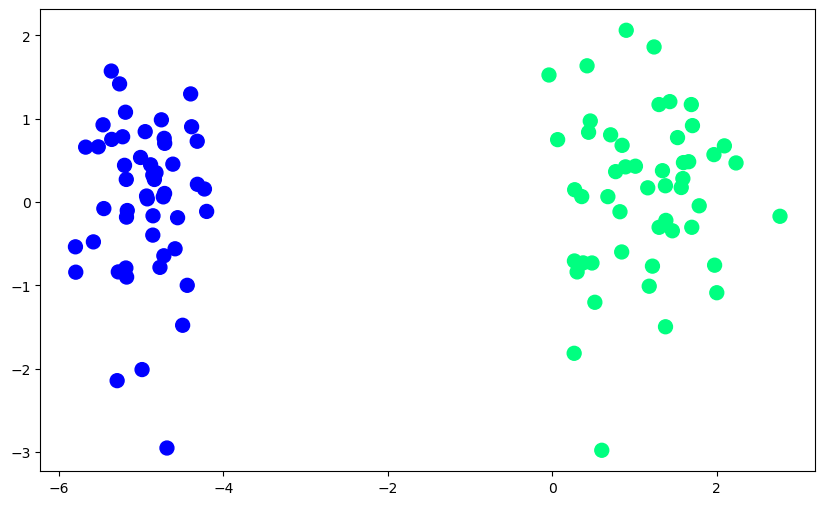

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

### Perceptron with step function.

In [45]:

class perceptron:
    def __init__(self,alpha,epoch):
        self.alpha = alpha
        self.epoch = epoch
        self.weights = None
    def fit(self,X_train , y_train):
        
        X_train = np.hstack((np.ones((X_train.shape[0] , 1)) , X_train))
        self.weights = np.ones(X_train.shape[1])
        for i in range(self.epoch):
            index = np.random.randint(0 , X_train.shape[0])
            y_hat = 1 if np.dot(X_train[index] , self.weights) >= 0 else 0
            self.weights = self.weights + self.alpha * (y_train[index] - y_hat) * X_train[index] 
    def predict(self,X_test):
        X_test = np.hstack((np.ones((X_test.shape[0] , 1)) , X_test))
        result = np.dot(X_test , self.weights) 
        return np.where(result >= 0 , 1 , 0)
         
            

In [51]:
model1 = perceptron(0.1 , 1000)
model1.fit(X , y)

In [77]:
weight = model1.weights

In [78]:
intercept_  = weight[0]
coef_ = weight[1:]

In [79]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [80]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

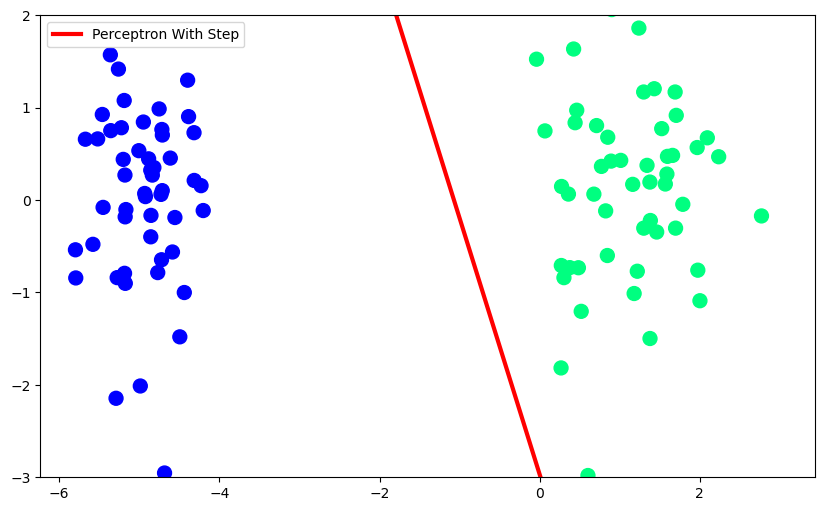

In [61]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label = "Perceptron With Step")
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()

### Logistic Regression

In [62]:
model2 = LogisticRegression()
model2.fit(X , y)

LogisticRegression()

In [64]:
m = -(model2.coef_[0][0]/model2.coef_[0][1])
b = -(model2.intercept_/model2.coef_[0][1])

In [65]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

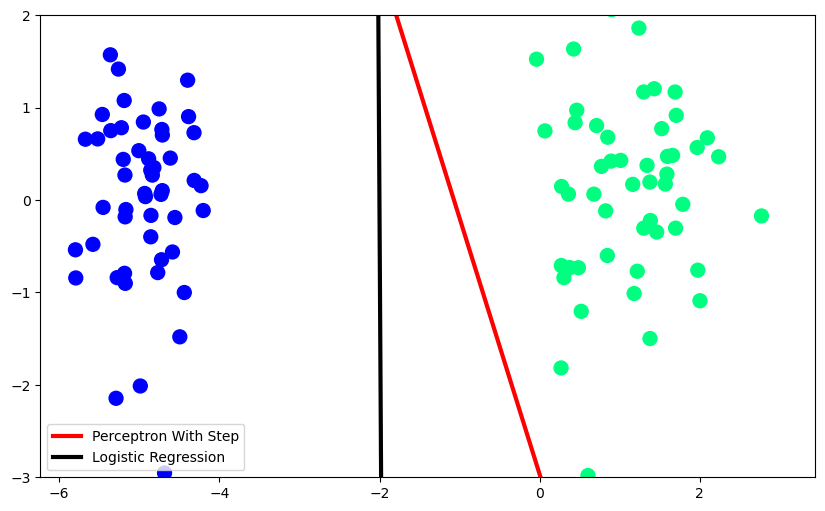

In [67]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3 , label = "Perceptron With Step")
plt.plot(x_input1,y_input1,color='black',linewidth=3 , label = "Logistic Regression")
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()

### Perceptron With Sigmoid

In [69]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z) )

In [71]:

class perceptron_with_sigmoid:
    def __init__(self,alpha,epoch):
        self.alpha = alpha
        self.epoch = epoch
        self.weights = None
    def fit(self,X_train , y_train):
        
        X_train = np.hstack((np.ones((X_train.shape[0] , 1)) , X_train))
        self.weights = np.ones(X_train.shape[1])
        for i in range(self.epoch):
            index = np.random.randint(0 , X_train.shape[0])
            y_hat = sigmoid(np.dot(X_train[index] , self.weights)) # Change 1
            self.weights = self.weights + self.alpha * (y_train[index] - y_hat) * X_train[index] 
    def predict(self,X_test):
        X_test = np.hstack((np.ones((X_test.shape[0] , 1)) , X_test))
        result = np.dot(X_test , self.weights) 
        result = sigmoid(result) # Change 2
        return np.where(result >= 0.5 , 1 , 0) # Change 3
         
            

In [73]:
model3 = perceptron_with_sigmoid(0.1 , 1000)

In [75]:
model3.fit(X , y)

In [82]:
weight = model3.weights
intercept_  = weight[0]
coef_ = weight[1:]
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input2 = np.linspace(-3,3,100)
y_input2= m*x_input + b

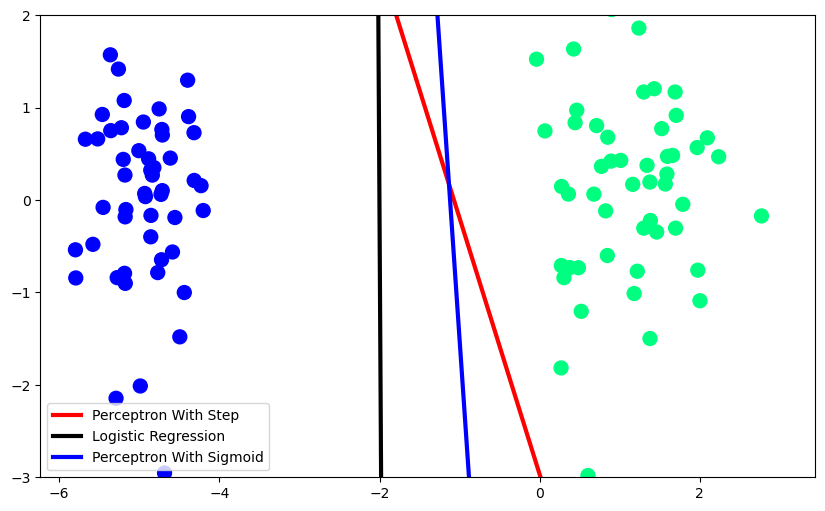

In [83]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3 , label = "Perceptron With Step")
plt.plot(x_input1,y_input1,color='black',linewidth=3 , label = "Logistic Regression")
plt.plot(x_input2,y_input2,color='blue',linewidth=3 , label = "Perceptron With Sigmoid")
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()